# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pycaret
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from pycaret.regression import *
from datetime import date, time 
from datetime import datetime, timedelta

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import sys

# Import Data from CSV

In [3]:
df = pd.read_csv("SeoulBikeData.csv", encoding= 'unicode_escape')

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Check Value counts for attributes

In [4]:
print(df['Functioning Day'].value_counts())

Yes    8465
No      295
Name: Functioning Day, dtype: int64


In [5]:
print(df['Holiday'].value_counts())

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64


In [6]:
print(df['Seasons'].value_counts())

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64


# Rename columns to remove special characters of units

In [7]:
df_columns = ["Date", "Rented Bike Count", "Hour", "Temperature", "Humidity", "Wind speed", "Visibility", 
              "Dew point temperature", "Solar radiation", "Rainfall", "Snowfall", "Seasons", "Holiday", "Functioning Day"]

In [8]:
df.columns = df_columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

# Check missing values

In [10]:
df.isna().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

# Check Correlation

In [11]:
df.corr()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature,0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed,0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature,0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar radiation,0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


<AxesSubplot:>

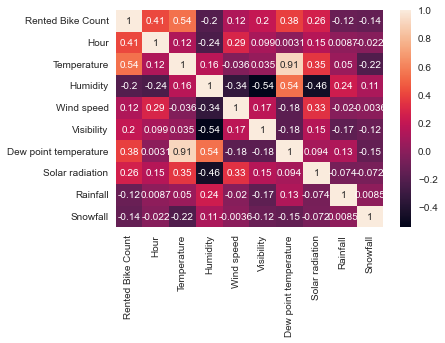

In [12]:
sns.heatmap(df.corr(), annot = True)

# Change "Seasons", "Holiday", and "Functioning Day" to numerical variables

In [13]:
encoded_df = pd.get_dummies(df, columns = ["Seasons", "Holiday", "Functioning Day"], drop_first = True)
encoded_df

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,0,1,1
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,0,1,1
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,0,1,1
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,0,1,1


# Move column "Rented Bike Count" to the last column

In [14]:
column_to_move = encoded_df.pop('Rented Bike Count')
encoded_df['Rented Bike Count'] = column_to_move
encoded_df

,Date,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1,254
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1,204
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,1,1,173
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1,107
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,1,1,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,0,1,1,1003
8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,0,1,1,764
8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,0,1,1,694
8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,0,1,1,712


# Combining 'Date' and 'Hour' columns into a new column

In [15]:
encoded_df['Timestamp'] = pd.to_datetime(encoded_df['Date']) + encoded_df['Hour'] * pd.to_timedelta('1H')
encoded_df

,Date,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Timestamp
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1,254,2017-01-12 00:00:00
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1,204,2017-01-12 01:00:00
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,1,1,173,2017-01-12 02:00:00
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1,107,2017-01-12 03:00:00
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,1,1,78,2017-01-12 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,0,1,1,1003,2018-11-30 19:00:00
8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,0,1,1,764,2018-11-30 20:00:00
8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,0,1,1,694,2018-11-30 21:00:00
8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,0,1,1,712,2018-11-30 22:00:00


In [16]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   object        
 1   Hour                   8760 non-null   int64         
 2   Temperature            8760 non-null   float64       
 3   Humidity               8760 non-null   int64         
 4   Wind speed             8760 non-null   float64       
 5   Visibility             8760 non-null   int64         
 6   Dew point temperature  8760 non-null   float64       
 7   Solar radiation        8760 non-null   float64       
 8   Rainfall               8760 non-null   float64       
 9   Snowfall               8760 non-null   float64       
 10  Seasons_Spring         8760 non-null   uint8         
 11  Seasons_Summer         8760 non-null   uint8         
 12  Seasons_Winter         8760 non-null   uint8         
 13  Hol

# ARIMA

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

### ARIMA requires at least two columns as inputs: a ds column and a y column.
#### ds column has the time information - renaming 'Timestamp' as 'ds'.
#### y column has the time series values - renaming 'Rented Bike Count' as 'y'.

In [19]:
rename_encoded_df = encoded_df.rename(columns = {"Timestamp": 'ds',
                              "Rented Bike Count": 'y'})

In [20]:
rename_encoded_df

,Date,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,y,ds
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1,254,2017-01-12 00:00:00
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1,204,2017-01-12 01:00:00
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,1,1,173,2017-01-12 02:00:00
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1,107,2017-01-12 03:00:00
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,1,1,78,2017-01-12 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,0,1,1,1003,2018-11-30 19:00:00
8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,0,1,1,764,2018-11-30 20:00:00
8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,0,1,1,694,2018-11-30 21:00:00
8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,0,1,1,712,2018-11-30 22:00:00


In [22]:
rename_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   object        
 1   Hour                   8760 non-null   int64         
 2   Temperature            8760 non-null   float64       
 3   Humidity               8760 non-null   int64         
 4   Wind speed             8760 non-null   float64       
 5   Visibility             8760 non-null   int64         
 6   Dew point temperature  8760 non-null   float64       
 7   Solar radiation        8760 non-null   float64       
 8   Rainfall               8760 non-null   float64       
 9   Snowfall               8760 non-null   float64       
 10  Seasons_Spring         8760 non-null   uint8         
 11  Seasons_Summer         8760 non-null   uint8         
 12  Seasons_Winter         8760 non-null   uint8         
 13  Hol

### Performing univariate forecasting with ARIMA. 
#### Creating a new dataframe with only timestamp and rented bike count

In [23]:
ts_df = rename_encoded_df[['y', 'ds']]

In [24]:
ts_df

,y,ds
0,254,2017-01-12 00:00:00
1,204,2017-01-12 01:00:00
2,173,2017-01-12 02:00:00
3,107,2017-01-12 03:00:00
4,78,2017-01-12 04:00:00
...,...,...
8755,1003,2018-11-30 19:00:00
8756,764,2018-11-30 20:00:00
8757,694,2018-11-30 21:00:00
8758,712,2018-11-30 22:00:00


In [25]:
train_data = ts_df.sample(frac=0.8, random_state=10)

In [26]:
train_data.shape

(7008, 2)

In [27]:
validation_data = ts_df.drop(train_data.index)

In [28]:
validation_data

,y,ds
2,173,2017-01-12 02:00:00
3,107,2017-01-12 03:00:00
6,181,2017-01-12 06:00:00
14,447,2017-01-12 14:00:00
26,262,2017-02-12 02:00:00
...,...,...
8744,1527,2018-11-30 08:00:00
8746,554,2018-11-30 10:00:00
8747,642,2018-11-30 11:00:00
8751,768,2018-11-30 15:00:00


In [30]:
train_data = train_data.set_index('ds')

In [31]:
train_data

,y
ds,
2017-12-17 05:00:00,31
2018-11-18 13:00:00,905
2018-04-29 12:00:00,1375
2018-06-30 22:00:00,1107
2018-04-20 06:00:00,414
...,...
2018-11-06 04:00:00,194
2017-12-23 22:00:00,282
2018-12-02 13:00:00,246


## Decomposition

In [32]:
decomposed = seasonal_decompose(train_data['y'], period = 12)

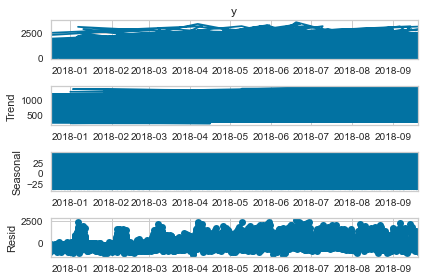

In [36]:
decomposed.plot();

<AxesSubplot:xlabel='ds'>

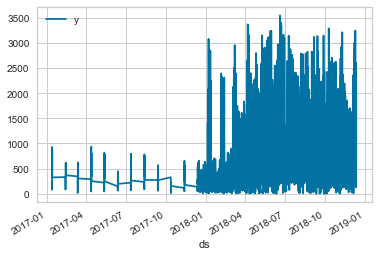

In [35]:
train_data.plot()

## Stationary Test

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
result = adfuller(train_data['y'])

In [39]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Time series is stationary")

else:
    print("Time series is not stationary")

ADF Statistic: -57.328175
p-value: 0.000000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time series is stationary


In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

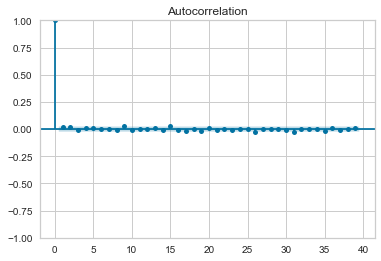

In [41]:
plot_acf(train_data['y']);

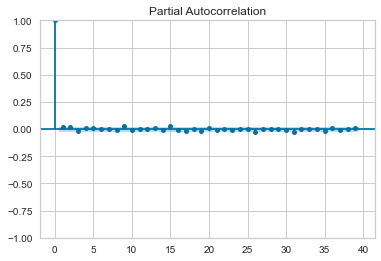

In [42]:
plot_pacf(train_data['y']);

In [43]:
from statsmodels.tsa.arima.model import ARIMA

In [44]:
train_data

,y
ds,
2017-12-17 05:00:00,31
2018-11-18 13:00:00,905
2018-04-29 12:00:00,1375
2018-06-30 22:00:00,1107
2018-04-20 06:00:00,414
...,...
2018-11-06 04:00:00,194
2017-12-23 22:00:00,282
2018-12-02 13:00:00,246


In [45]:
arima_model = ARIMA(train_data, order=(3,0,3))

## ARIMA result summary

In [46]:
result_arima = arima_model.fit()

In [47]:
arima_prediction = result_arima.forecast()
arima_prediction

7008    711.713152
dtype: float64

In [48]:
predictions = list()

In [49]:
yhat = arima_prediction[0]
predictions.append(yhat)

KeyError: 0

In [50]:
result_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7008
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -55294.431
Date:                Sat, 07 Jan 2023   AIC                         110604.861
Time:                        09:09:21   BIC                         110659.699
Sample:                             0   HQIC                        110623.756
                               - 7008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        703.8429     11.315     62.202      0.000     681.665     726.021
ar.L1          0.0312      0.763      0.041      0.967      -1.464       1.526
ar.L2          0.3922      0.385      1.019      0.308      -0.362       1.147
ar.L3          0.2194      0.374      0.587      0.557      -0.514       0.952
ma.L1         -0.0111      0.762     -0.015      0.988      -1.504       1.482
ma.L2         -0.3692      0.394     -0.937      0.349      -1.142       0.403
ma.L3         -0.2385      0.359     -0.664      0.506      -0.942       0.465
sigma2      4.181e+05   8239.269     50.750      0.000    4.02e+05    4.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1703.77
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             1.14
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
from matplotlib import pyplot

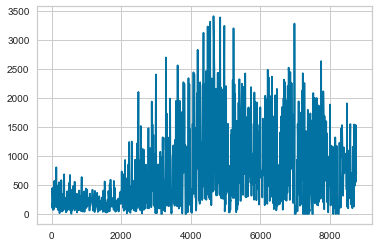

In [52]:
pyplot.plot(validation_data['y'])
pyplot.plot(arima_prediction, color='red')
pyplot.show()

## Residual

In [53]:
residuals = result_arima.resid

<AxesSubplot:ylabel='Density'>

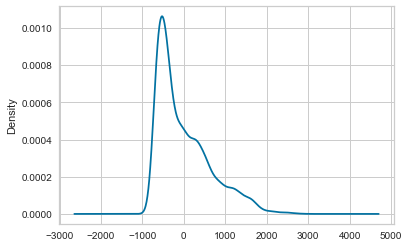

In [54]:
residuals.plot(kind = 'kde')

# Seasonal-ARIMA

In [55]:
import statsmodels.api as sm

In [56]:
arima_model_new = sm.tsa.statespace.SARIMAX(train_data['y'], order = (9,0,2), seasonal_order = (1,1,1,12))
result = arima_model_new.fit()

: 

: 

In [ ]:
validation_data['forecast'] = result.forecast()

In [ ]:
validation_data

In [ ]:
validation_data[['y', 'forecast']].plot(figsize = (12, 8))

In [ ]:
train_data

In [ ]:
train_data['forecast']

In [ ]:
mean_absolute_error(train_data['y'], train_data['forecast'])